### 1. Importing Libraries:

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import tensorflow as tf


from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, TimeDistributed, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam

import pickle
import os

In [2]:
import tensorflow as tf
import keras

In [3]:
# tf.debugging.set_log_device_placement(True)

In [4]:
MAX_LEN_TEXT = 1892
MAX_LEN_SUMMARY = 29

### 2. Reading Data:

In [5]:
x_train = pd.read_csv(r"U:\nlp_project\text_summarization\artifacts\data\preprocessed_data\x_train.csv")
y_train = pd.read_csv(r"U:\nlp_project\text_summarization\artifacts\data\preprocessed_data\y_train.csv")

In [6]:
x_test = pd.read_csv(r"U:\nlp_project\text_summarization\artifacts\data\preprocessed_data\x_test.csv")
y_test = pd.read_csv(r"U:\nlp_project\text_summarization\artifacts\data\preprocessed_data\y_test.csv")

In [7]:
x_val = pd.read_csv(r"U:\nlp_project\text_summarization\artifacts\data\preprocessed_data\x_val.csv")
y_val = pd.read_csv(r"U:\nlp_project\text_summarization\artifacts\data\preprocessed_data\y_val.csv")

In [8]:
print(f"shape of x_train: {x_train.shape} and y_train: {y_train.shape}")
print(f"shape of x_test: {x_test.shape} and y_train: {y_test.shape}")
print(f"shape of x_val: {x_val.shape} and y_train: {y_val.shape}")

shape of x_train: (251667, 1) and y_train: (251667, 1)
shape of x_test: (78647, 1) and y_train: (78647, 1)
shape of x_val: (62917, 1) and y_train: (62917, 1)


In [9]:
print(type(x_train["cleaned_text"]))
print(type(y_train["cleaned_summary"]))
print("\n")
print(type(x_val["cleaned_text"]))
print(type(y_val["cleaned_summary"]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


### 3. prepairing Tokenizer

#### 3.1 Text Tokenizer

In [10]:
text_tokenizer = Tokenizer()
text_tokenizer.fit_on_texts(list(x_train["cleaned_text"]))

#convert text sequences into integer sequences
x_train = text_tokenizer.texts_to_sequences(list(x_train["cleaned_text"])) 
x_test  = text_tokenizer.texts_to_sequences(list(x_test["cleaned_text"]))
x_val = text_tokenizer.texts_to_sequences(list(x_val["cleaned_text"]))


# padding zero upto maximum length
x_train = pad_sequences(x_train,  maxlen=MAX_LEN_TEXT, padding='post') 
x_test = pad_sequences(x_test, maxlen=MAX_LEN_TEXT, padding='post')
x_val = pad_sequences(x_val, maxlen=MAX_LEN_TEXT, padding='post')

In [12]:
print(f"shape of x_train: {x_train.shape} and y_train: {y_train.shape}")
print(f"shape of x_test: {x_test.shape} and y_train: {y_test.shape}")
print(f"shape of x_val: {x_val.shape} and y_train: {y_val.shape}")

shape of x_train: (251667, 1892) and y_train: (251667, 1)
shape of x_test: (78647, 1892) and y_train: (78647, 1)
shape of x_val: (62917, 1892) and y_train: (62917, 1)


In [13]:
len(x_train[0])  # similarly are points are padded to length of 1892

1892

In [14]:
text_voc_size   =  len(text_tokenizer.word_index) +1

In [15]:
text_voc_size

95454

#### 3.2 Summary Tokenizer

In [16]:
#preparing a tokenizer for summary on training data 
summary_tokenizer = Tokenizer()
summary_tokenizer.fit_on_texts(list(y_train["cleaned_summary"]))

#convert summary sequences into integer sequences
y_train = summary_tokenizer.texts_to_sequences(list(y_train["cleaned_summary"])) 
y_test = summary_tokenizer.texts_to_sequences(list(y_test["cleaned_summary"])) 
y_val = summary_tokenizer.texts_to_sequences(list(y_val["cleaned_summary"])) 

#padding zero upto maximum length
y_train = pad_sequences(y_train, maxlen=MAX_LEN_SUMMARY, padding='post')
y_test = pad_sequences(y_test, maxlen=MAX_LEN_SUMMARY, padding='post')
y_val = pad_sequences(y_val, maxlen=MAX_LEN_SUMMARY, padding='post')

summary_voc_size  =   len(summary_tokenizer.word_index) +1

In [17]:
print(f"shape of x_train: {x_train.shape} and y_train: {y_train.shape}")
print(f"shape of x_test: {x_test.shape} and y_train: {y_test.shape}")
print(f"shape of x_val: {x_val.shape} and y_train: {y_val.shape}")

shape of x_train: (251667, 1892) and y_train: (251667, 29)
shape of x_test: (78647, 1892) and y_train: (78647, 29)
shape of x_val: (62917, 1892) and y_train: (62917, 29)


In [18]:
import numpy as np
print(np.isnan(x_train).any(), np.isinf(x_train).any())
print(np.isnan(x_test).any(), np.isinf(y_test).any())
print(np.isnan(x_val).any(), np.isinf(y_val).any())

False False
False False
False False


### 4. save the tokenizers:

In [19]:
text_tokenizer_dir = os.path.join(r'U:\nlp_project\text_summarization\artifacts\tokenizer', 'text_tokenizer')
summary_tokenizer_dir = os.path.join(r'U:\nlp_project\text_summarization\artifacts\tokenizer', 'summary_tokenizer')

In [20]:
if not os.path.exists(text_tokenizer_dir) and not os.path.exists(summary_tokenizer_dir):
    os.mkdir(text_tokenizer_dir)
    os.mkdir(summary_tokenizer_dir)

x_tokenizer_path = os.path.join(text_tokenizer_dir, 'text_tokenizer') + '.pkl'
with open(x_tokenizer_path, 'wb') as file:
    pickle.dump(text_tokenizer, file)

y_tokenizer_path = os.path.join(summary_tokenizer_dir, 'summary_tokenizer') + '.pkl'
with open(y_tokenizer_path, 'wb') as file:
    pickle.dump(summary_tokenizer, file)

In [21]:
# Enable memory growth for GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus[0].device_type:
    try:
        for gpu in gpus:
            tf.config.set_logical_device_configuration(gpus[0], [tf.config.LogicalDeviceConfiguration(memory_limit=1024*2)])
            # tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)  # This will catch the error if it's already initializeda

1 Physical GPUs, 1 Logical GPUs


### 5. Building Model:

In [ ]:
latent_dim = 256
class create_encoder(keras.Model):
    def __init__(self,encoder_inputs,text_voc_size):
        super().__init__()
        self.encoder_emb = Embedding(text_voc_size, latent_dim,trainable=True,name="encoder_emb")(encoder_inputs)
        self.encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,name="lstm1",dropout=0.1)
        self.encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,name="lstm2",dropout=0.1)
        self.encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,name="lstm3",dropout=0.1)

    def call(self,training=False):
        encoder_output1, state_h1, state_c1 = self.encoder_lstm1(self.encoder_emb)
        encoder_output2, state_h2, state_c2 = self.encoder_lstm2(encoder_output1)
        encoder_outputs, state_h, state_c = self.encoder_lstm3(encoder_output2)
        return [state_h,state_c]
    

class create_decoder(keras.Model):
    def __init__(self,decoder_inputs):
        super().__init__()
        self.decoder_emb_layer = Embedding(summary_voc_size, latent_dim,trainable=True,name="decoder_emb")(decoder_inputs)
        self.decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,name="decoder_lstm",dropout=0.1) 
        self.decoder_dense = TimeDistributed(Dense(summary_voc_size, activation='softmax'))
        
    def call(self,context_vector):
        decoder_outputs,decoder_fwd_state, decoder_back_state = self.decoder_lstm(self.decoder_emb_layer,initial_state=[context_vector[0], context_vector[1]])
        decoder_output = self.decoder_dense(decoder_outputs)
        return decoder_output

In [23]:
encoder_inputs = Input(MAX_LEN_TEXT)
encoder = create_encoder(encoder_inputs,text_voc_size)
context_vector = encoder.call(True)

decoder_inputs = Input(shape=(None,)) # variable length input.
decoder = create_decoder(decoder_inputs)
decoder_output = decoder.call(context_vector)

model = Model(inputs = [encoder_inputs, decoder_inputs], outputs = decoder_output)

In [25]:
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1892)]       0           []                               
                                                                                                  
 encoder_emb (Embedding)        (None, 1892, 256)    24436224    ['input_2[0][0]']                
                                                                                                  
 lstm1 (LSTM)                   [(None, 1892, 256),  525312      ['encoder_emb[0][0]']            
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

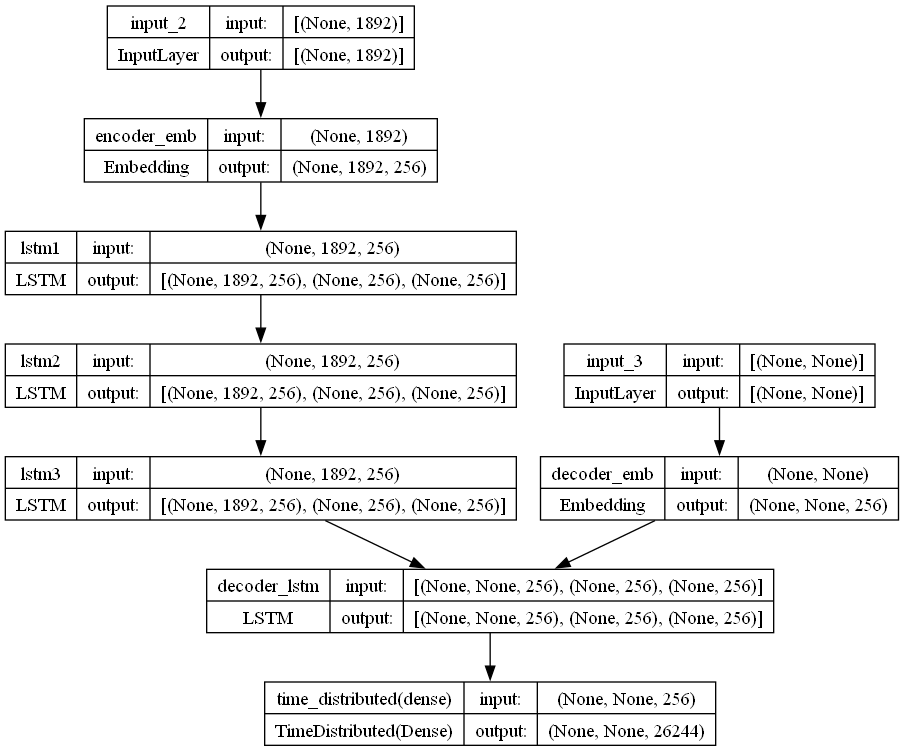

In [27]:
# This code require graphviz to run
from keras.utils import plot_model
plot_model(model=model, show_shapes=True, show_layer_names=True)

In [28]:
model.layers

#### start model training

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
callbacks = [es]

In [35]:
x_train = x_train[:15000]
y_train = y_train[:15000]
x_val = x_val[:100]
y_val = y_val[:100]

In [37]:
history = model.fit([x_train, y_train[:, :-1]], 
      y_train.reshape(y_train.shape[0], y_train.shape[1], 1)[:, 1:], 
        epochs=10,
        callbacks=callbacks, 
          batch_size=16,
            validation_data=([x_val, y_val[:, :-1]], 
                                     y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:]), verbose=True)

Epoch 1/10
938/938 [==============================] - 353s 374ms/step - loss: 1.0742 - val_loss: 0.9049
Epoch 2/10
938/938 [==============================] - 348s 371ms/step - loss: 0.9603 - val_loss: 0.8777
Epoch 3/10
938/938 [==============================] - 348s 371ms/step - loss: 0.9055 - val_loss: 0.8511
Epoch 4/10
938/938 [==============================] - 347s 370ms/step - loss: 0.8586 - val_loss: 0.8368
Epoch 5/10
938/938 [==============================] - 348s 371ms/step - loss: 0.8186 - val_loss: 0.8281
Epoch 6/10
938/938 [==============================] - 346s 368ms/step - loss: 0.7829 - val_loss: 0.8232
Epoch 7/10
938/938 [==============================] - 358s 381ms/step - loss: 0.7498 - val_loss: 0.8272
Epoch 8/10
938/938 [==============================] - 348s 371ms/step - loss: 0.7178 - val_loss: 0.8282
Epoch 9/10
938/938 [==============================] - 346s 368ms/step - loss: 0.6862 - val_loss: 0.8349
Epoch 10/10
938/938 [==============================] - 347s 369m

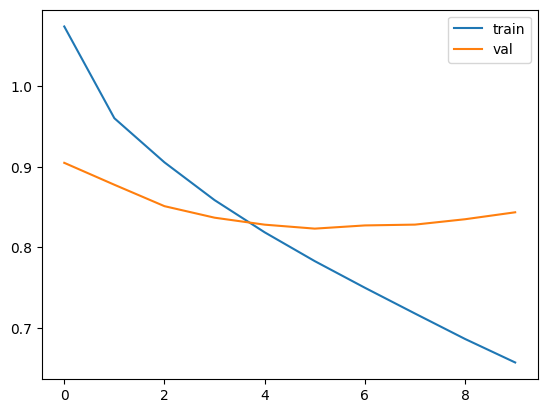

In [38]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='val') 
pyplot.legend() 
pyplot.show()

### Save Model:

In [42]:
model_dir = os.path.join(r'U:\nlp_project\text_summarization\artifacts', 'model')

if not os.path.exists(model_dir):
    os.mkdir(model_dir)

In [47]:
model.save(r'U:\nlp_project\text_summarization\artifacts\model\model.h5')

In [48]:
model.save_weights(r'U:\nlp_project\text_summarization\artifacts\weights\model_weights.h5')

In [49]:
from keras import backend as K
K.clear_session()